<a href="https://colab.research.google.com/github/asmyasikova83/data_analysis/blob/main/%22Marketplace_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Загрузка**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/Zerocoder/marketplace_dataframe.csv")

##**Предобработка**

In [ ]:

#remove col Unnamed
df = df.drop(columns=['Unnamed: 0'])
#Преобразование столбцов к нужным типам данных
df['Дата создания'] = pd.to_datetime(df['Дата создания'], format='%d.%m.%Y')
df['Дата оплаты'] = pd.to_datetime(df['Дата оплаты'], format='%d.%m.%Y')
df['Количество заказов'] = df['Количество заказов'].astype(int)
#remove na if any
df = df.dropna()


##*За какой период данные*

In [ ]:
start_date = df['Дата создания'].min()
end_date = df['Дата создания'].max()
print(f'Данные охватывают период с {start_date} по {end_date}')

Данные охватывают период с 2021-07-01 00:00:00 по 2022-01-12 00:00:00


##*Сколько уникальных клиентов, категорий, методов оплат*

In [ ]:
unique_clients = df['ID клиента'].nunique()
unique_categories = df['Категория'].nunique()
unique_payment_methods = df['Метод оплаты'].nunique()
unique_statuses = df['Статус'].nunique()

print(unique_clients)
print(unique_categories)
print(unique_payment_methods)
print(unique_statuses)

30874
16
10
9


In [ ]:
df['Категория'].unique()

array(['Женская мода', 'Красота и уход', 'Традиционные подарки',
       'Мобильные телефоны и планшеты', 'Бытовая техника', 'Дом и быт',
       'Мужская мода', 'Дети и младенцы', '\\N', 'Компьютерная техника',
       'Гипермаркет', 'Другое', 'Здоровье и спорт', 'Развлечения',
       'Книги', 'Школа и образование'], dtype=object)

In [ ]:
df['Статус'].unique()

array(['завершен', 'отменен', 'заказ возвращен', 'получен',
       'оформлен возврат', 'закрыт', 'мошенничество', 'на удержании',
       'обмен'], dtype=object)

In [ ]:
df['Метод оплаты'].unique()

array(['наложенный платеж', 'кредитная карта UBL', 'дебетовая карта Raif',
       'клиентский кредит', 'мобильный банкинг MCB',
       'маркетинговые расходы', 'наличные при доставке',
       'товарный кредит', 'платежная система Payaxis', 'ваучер'],
      dtype=object)

##*Средний чек клиента*


In [ ]:
average_order_value = df['Итоговая сумма'].mean()
print(f'Средний чек клиента: {average_order_value:.2f} RuR')

Средний чек клиента: 5181.28 RuR


##*Распределение по статусам*

In [ ]:
status_distribution = df['Статус'].value_counts()


##*Визуализация распределения по статусам*

<ipython-input-90-1c8935167392>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


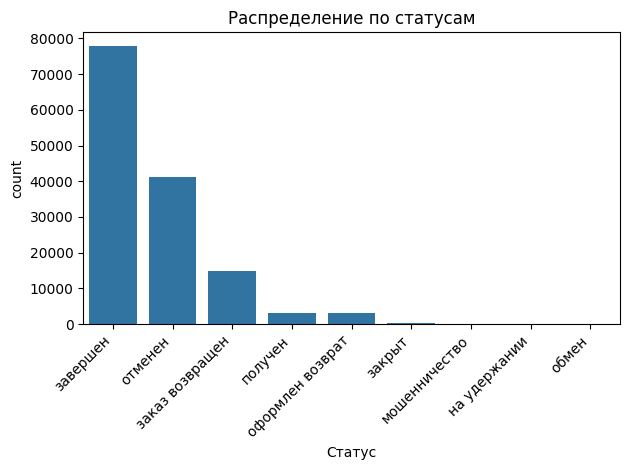

In [ ]:


ax = sns.countplot(data=df, x='Статус')
#Разворот меток на 45 %, x-axis
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Распределение по статусам')

##Показать график
#Правильное размещение меток
plt.tight_layout()
plt.show()

In [ ]:
status_distribution.head()

Статус
завершен            77810
отменен             41190
заказ возвращен     14732
получен              3059
оформлен возврат     2980
Name: count, dtype: int64

###*Динамика продаж*

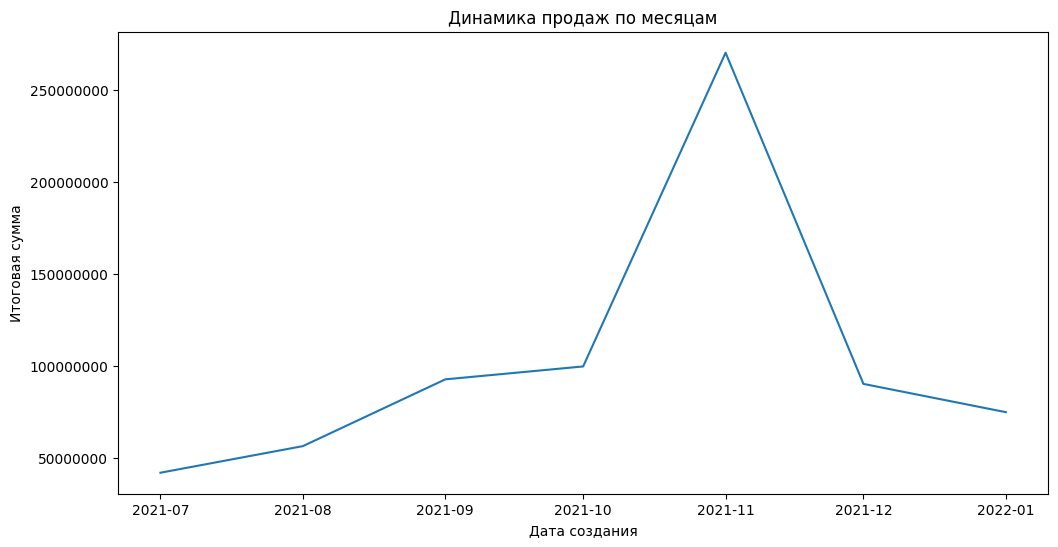

In [ ]:

from matplotlib.pyplot import ScalarFormatter

sales_trend = df.groupby(df['Дата создания'].dt.to_period('M')).agg({'Итоговая сумма': 'sum'}).reset_index()
sales_trend['Дата создания'] = sales_trend['Дата создания'].dt.to_timestamp()

plt.figure(figsize = (12, 6))
ax = sns.lineplot(data=sales_trend, x='Дата создания', y='Итоговая сумма')
ax.set_title('Динамика продаж по месяцам')

#Отключение научной нотации
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')
plt.show()

In [ ]:
sales_trend

,Дата создания,Итоговая сумма
0,2021-07-01,41761709
1,2021-08-01,56237264
2,2021-09-01,92580494
3,2021-10-01,99610052
4,2021-11-01,270368494
5,2021-12-01,90104486
6,2022-01-01,74721376


##*Продажи по дням недели*

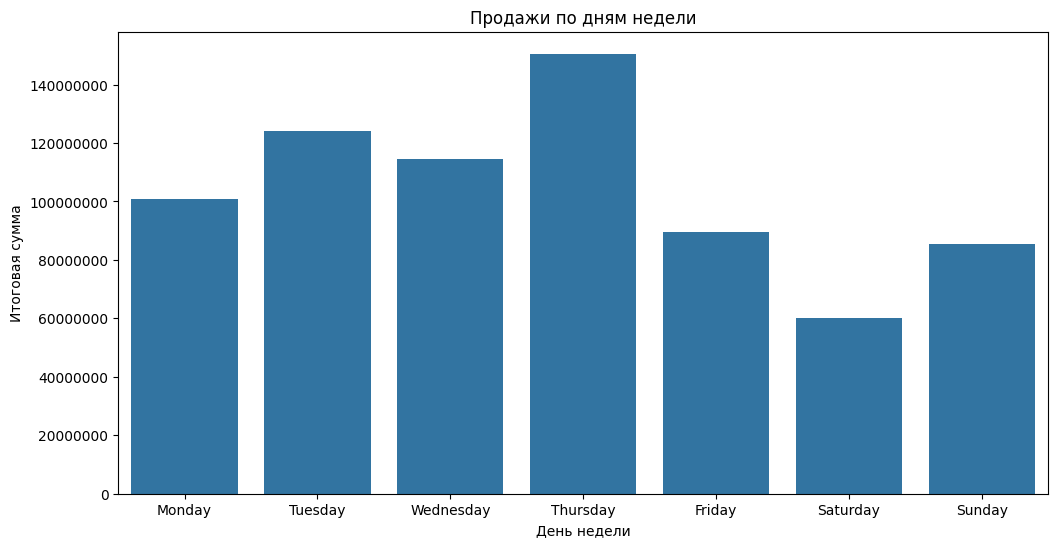

In [ ]:
df['День недели'] = df['Дата создания'].dt.day_name()
weekday_sales = df.groupby('День недели').agg({'Итоговая сумма': 'sum'}).reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize = (12, 6))
ax = sns.barplot(x=weekday_sales.index, y=weekday_sales['Итоговая сумма'])
ax.set_title('Продажи по дням недели')
#Отключение научной нотации
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')
plt.show()

##*GMV по каждой категории*

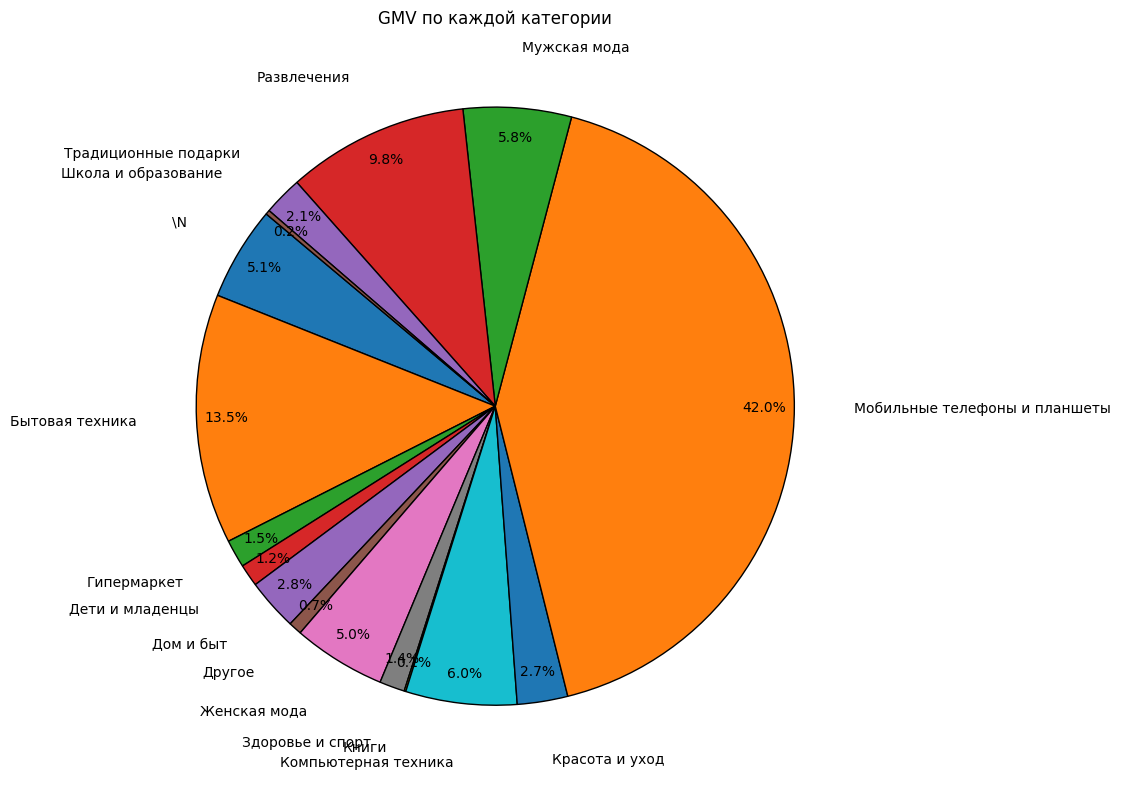

In [ ]:
gmv_by_category = df.groupby('Категория').agg({'Итоговая сумма': 'sum'}).reset_index()

plt.figure(figsize = (10, 8))
plt.pie(gmv_by_category['Итоговая сумма'], labels=gmv_by_category['Категория'], autopct='%1.1f%%', startangle=140,
        labeldistance = 1.2, pctdistance = 0.9, wedgeprops={'edgecolor': 'black'})
plt.title('GMV по каждой категории')
plt.tight_layout()
plt.show()

In [ ]:
gmv_by_category

,Категория,Итоговая сумма
0,\N,36772543
1,Бытовая техника,97934753
2,Гипермаркет,10971331
3,Дети и младенцы,8749241
4,Дом и быт,20283158
5,Другое,5199769
6,Женская мода,36405325
7,Здоровье и спорт,9896442
8,Книги,644076
9,Компьютерная техника,43589022


##*Доля отмен*

<ipython-input-97-1e0cf5f09429>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


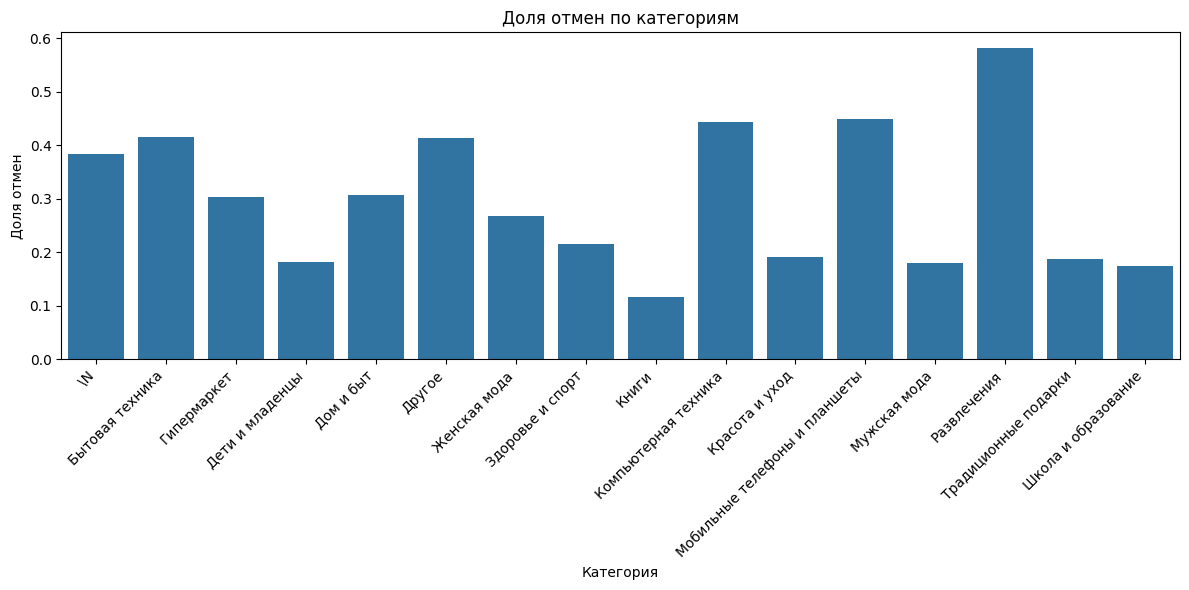

In [ ]:
cancellation_rate = df[df['Статус'] == 'отменен'].groupby('Категория').size() / df.groupby('Категория').size()
cancellation_rate = cancellation_rate.fillna(0).reset_index(name='Доля отмен')

#Визуализация доли отмен по категориям

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Категория', y='Доля отмен', data=cancellation_rate)
ax.set_title('Доля отмен по категориям')
ax.set_ylabel('Доля отмен')
ax.set_xlabel('Категория')

#Разворот меток на 45 %, x-axis
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

##Показать график
#Правильное размещение меток
plt.tight_layout()
plt.show()

In [ ]:
cancellation_rate

,Категория,Доля отмен
0,\N,0.383206
1,Бытовая техника,0.416276
2,Гипермаркет,0.302626
3,Дети и младенцы,0.181940
4,Дом и быт,0.306903
5,Другое,0.414147
6,Женская мода,0.268658
7,Здоровье и спорт,0.215196
8,Книги,0.116592
9,Компьютерная техника,0.444076


##*На какие категории скидки*

<ipython-input-99-05daa0dfc1d7>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


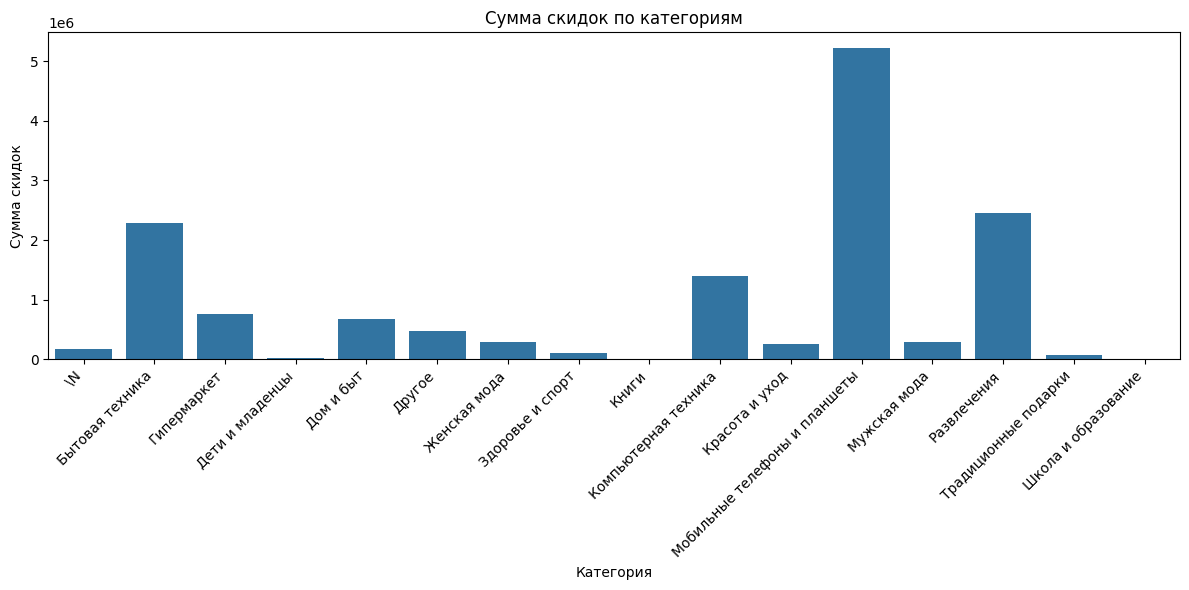

In [ ]:
#Преобразование к нужному типу данных
df['Категория'] = df['Категория'].astype('str')
df['Сумма скидки'] = pd.to_numeric(df['Сумма скидки'], errors='coerce')

discounted_categories = df[df['Сумма скидки'] > 0]['Категория'].unique()

#Вычисление суммы скидок по категориям
discounted_by_category = df.groupby('Категория').agg({'Сумма скидки' : 'sum'}).reset_index()

#Визуализация суммы скидок по категориям
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Категория', y='Сумма скидки', data=discounted_by_category)
ax.set_title('Сумма скидок по категориям')
ax.set_ylabel('Сумма скидок')
ax.set_xlabel('Категория')

#Разворот меток на 45 %, x-axis
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

##Показать график
#Правильное размещение меток
plt.tight_layout()
plt.show()

##*Рейтинг самых продаваемых товаров*

In [ ]:
#Рейтинг самых продаваемых товаров с категорией
df['Количество заказов'] = pd.to_numeric(df['Количество заказов'], errors='coerce')
df['Артикул товара'] = df['Артикул товара'].astype('str')
df['Категория'] = df['Категория'].astype('str')

top_products = df.groupby(['Артикул товара', 'Категория']).agg({'Количество заказов' : 'sum'}).reset_index()
top_products = top_products.sort_values(by='Количество заказов', ascending=False).reset_index(drop=True)
top_products.head(10)

,Артикул товара,Категория,Количество заказов
0,Al Muhafiz Sohan Halwa Almond,Традиционные подарки,2397
1,emart_00-7,Дом и быт,1696
2,kcc_krone deal,Красота и уход,1611
3,emart_00-1,\N,1535
4,RS_Plain Rusk,Традиционные подарки,1335
5,RB_Household Bundle,Гипермаркет,1293
6,shahi_buy one get one free Shahi Dal Moong,Традиционные подарки,1268
7,unilever_Deal-6,Гипермаркет,1208
8,Rubian_U8 Smart Watch,Мобильные телефоны и планшеты,897
9,Telemall_MM-DR-HB-L,\N,892
